In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt
from consts import sensor_idd as idd
import pickle

In [2]:
ori_path = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

In [15]:
df_sum = pd.DataFrame()
sum = 0
for file in file_list:
    if '.txt' in file:
        df = pd.read_csv(ori_path+file,sep=' ',names=name)
        df_sum = pd.concat([df_sum,df],axis=0)
        sum += len(df)
        print(file,'Done')

sensorscope-meteo-99.txt Done
sensorscope-meteo-87.txt Done
sensorscope-meteo-17.txt Done
sensorscope-meteo-53.txt Done
sensorscope-meteo-68.txt Done
sensorscope-meteo-24.txt Done
sensorscope-meteo-39.txt Done
sensorscope-meteo-85.txt Done
sensorscope-meteo-34.txt Done
sensorscope-meteo-49.txt Done
sensorscope-meteo-42.txt Done
sensorscope-meteo-104.txt Done
sensorscope-meteo-95.txt Done
sensorscope-meteo-96.txt Done
sensorscope-meteo-32.txt Done
sensorscope-meteo-40.txt Done
sensorscope-meteo-23.txt Done
sensorscope-meteo-18.txt Done
sensorscope-meteo-60.txt Done
sensorscope-meteo-25.txt Done
sensorscope-meteo-37.txt Done
sensorscope-meteo-122.txt Done
sensorscope-meteo-79.txt Done
sensorscope-meteo-56.txt Done
sensorscope-meteo-31.txt Done
sensorscope-meteo-100.txt Done
sensorscope-meteo-10.txt Done
sensorscope-meteo-97.txt Done
sensorscope-meteo-94.txt Done
sensorscope-meteo-11.txt Done
sensorscope-meteo-70.txt Done
sensorscope-meteo-59.txt Done
sensorscope-meteo-82.txt Done
sensors

In [27]:
df_sum.to_hdf('rr_df_sum.h5',key='df_sum',mode='w')

In [ ]:
df_sum = pd.read_hdf('rr_df_sum.h5','df_sum')

In [4]:
# 4
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [5]:
# 5
def draw_lune_heatmap(df,res,lat=lat,log=log):
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) >= 1:
                pairs.append([i*res+j,sub_df['ID'].values])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[10, array([63])], [14, array([ 3, 23, 42])], [15, array([ 5, 17])], [20, array([47])], [21, array([7])], [22, array([27])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [32, array([111])], [33, array([64, 75, 99])], [34, array([57])], [35, array([59])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [41, array([61])], [42, array([71])], [43, array([65])], [45, array([82])], [46, array([62])], [48, array([76])], [51, array([51])], [52, array([11])], [53, array([ 70, 122])], [54, array([49, 68])], [57, array([60])], [60, array([84])], [61, array([81])], [62, array([55])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [67, array([31])], [68, array([69])], [69, array([79, 95])], [70, array([103])], [71, array([80])], [72, array([96])], [75, array([92, 97])], [76, array([100])], [77, array([33, 53])], [78, array([10, 19])],

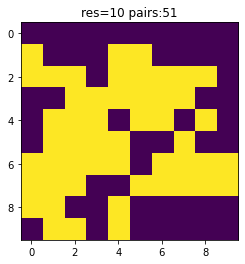

In [6]:
# 6
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

In [9]:
# dump paris
with open('rr_pairs.pkl','wb') as f:
    pickle.dump(pairs,f)

In [4]:
# load paris
with open('rr_pairs.pkl','rb') as f:
    pairs = pickle.load(f)

In [5]:
# pairs[id,sensor_pair]
for item in pairs:
    print('loc: {}, sensor_pair: {}'.format(item[0],item[1]))

loc: 10, sensor_pair: [63]
loc: 14, sensor_pair: [ 3 23 42]
loc: 15, sensor_pair: [ 5 17]
loc: 20, sensor_pair: [47]
loc: 21, sensor_pair: [7]
loc: 22, sensor_pair: [27]
loc: 24, sensor_pair: [21 26 41]
loc: 25, sensor_pair: [14 30 39 56]
loc: 26, sensor_pair: [  9  15  18  24  37  44 105 121]
loc: 27, sensor_pair: [12 45 46]
loc: 28, sensor_pair: [ 8 25 36]
loc: 32, sensor_pair: [111]
loc: 33, sensor_pair: [64 75 99]
loc: 34, sensor_pair: [57]
loc: 35, sensor_pair: [59]
loc: 36, sensor_pair: [13 40]
loc: 37, sensor_pair: [ 34  43 106]
loc: 41, sensor_pair: [61]
loc: 42, sensor_pair: [71]
loc: 43, sensor_pair: [65]
loc: 45, sensor_pair: [82]
loc: 46, sensor_pair: [62]
loc: 48, sensor_pair: [76]
loc: 51, sensor_pair: [51]
loc: 52, sensor_pair: [11]
loc: 53, sensor_pair: [ 70 122]
loc: 54, sensor_pair: [49 68]
loc: 57, sensor_pair: [60]
loc: 60, sensor_pair: [84]
loc: 61, sensor_pair: [81]
loc: 62, sensor_pair: [55]
loc: 63, sensor_pair: [66 72]
loc: 64, sensor_pair: [54 73]
loc: 66, sen

In [11]:
# dump id_records_dict
id_records_dict = {3: 463366, 5: 473401, 7: 131753, 8: 508506, 9: 419401, 10: 365048, 11: 474258, 12: 495806, 13: 446626, 14: 507791, 15: 507981, 17: 508058, 18: 510324, 19: 468463, 21: 516111, 23: 508496, 24: 515165, 25: 486527, 26: 523660, 27: 122838, 30: 459515, 31: 475734, 32: 486101, 33: 489204, 34: 515546, 35: 520571, 36: 484879, 37: 481248, 39: 498798, 40: 465524, 41: 492508, 42: 476141, 43: 474557, 44: 502059, 45: 496420, 46: 509826, 47: 132309, 49: 449340, 50: 452121, 51: 463746, 53: 481535, 54: 447130, 55: 466390, 56: 348901, 57: 409707, 59: 275774, 60: 462547, 61: 267775, 62: 325345, 63: 287042, 64: 307468, 65: 364818, 66: 448698, 68: 368898, 69: 494813, 70: 477651, 71: 255942, 72: 462363, 73: 457270, 75: 371510, 76: 427241, 79: 421204, 80: 435960, 81: 388750, 82: 194407, 84: 447777, 85: 446444, 87: 462860, 88: 384518, 89: 457590, 92: 441339, 93: 471416, 94: 258488, 95: 366746, 96: 474777, 97: 455939, 98: 347117, 99: 254211, 100: 481362, 103: 453399, 104: 455293, 105: 340836, 106: 358605, 107: 367659, 109: 240373, 111: 374388, 121: 1268694, 122: 378219}
with open('rr_id_records_dict.pkl','wb') as f:
    pickle.dump(id_records_dict,f)

In [7]:
# load id_records_dict
with open('rr_id_records_dict.pkl','rb') as f:
    id_records_dict=pickle.load(f)

In [21]:
# 总索引字典
idd_uniq = np.unique(df_sum[idd].values)
id_records_dict = {}
for id in idd_uniq:
    tmp_df = df_sum[df_sum[idd] == id]
    id_records_dict[id] = len(tmp_df)
print(idd_uniq)
print(id_records_dict)

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122]
{3: 463366, 5: 473401, 7: 131753, 8: 508506, 9: 419401, 10: 365048, 11: 474258, 12: 495806, 13: 446626, 14: 507791, 15: 507981, 17: 508058, 18: 510324, 19: 468463, 21: 516111, 23: 508496, 24: 515165, 25: 486527, 26: 523660, 27: 122838, 30: 459515, 31: 475734, 32: 486101, 33: 489204, 34: 515546, 35: 520571, 36: 484879, 37: 481248, 39: 498798, 40: 465524, 41: 492508, 42: 476141, 43: 474557, 44: 502059, 45: 496420, 46: 509826, 47: 132309, 49: 449340, 50: 452121, 51: 463746, 53: 481535, 54: 447130, 55: 466390, 56: 348901, 57: 409707, 59: 275774, 60: 462547, 61: 267775, 62: 325345, 63: 287042, 64: 307468, 65: 364818, 66: 448698, 68: 368898

In [13]:
# pick the sensor in a sensor pair with the maximum log 
id_list =[]
for pair in pairs:
    max_length = 0
    max_id = 0
    for i,id in enumerate(pair[1]):
        records_num = id_records_dict[id]
        if(records_num > max_length):
            max_length = id_records_dict[id]
            max_id = id
    id_list.append(max_id)
id_array = np.sort(np.array(id_list))
print(id_array)

[  7   8  11  14  17  19  23  26  27  31  33  34  35  40  46  47  49  51
  55  57  59  60  61  62  63  65  69  70  71  72  73  75  76  79  80  81
  82  84  87  88  89  93  96  97  98 100 103 104 109 111 121]


In [26]:
# dump id_array
with open('rr_id_array.pkl','wb') as f:
    pickle.dump(id_array,f)

51

[      0.       0.       0.  463366.       0.  473401.       0.  131753.
  508506.  419401.  365048.  474258.  495806.  446626.  507791.  507981.
       0.  508058.  510324.  468463.       0.  516111.       0.  508496.
  515165.  486527.  523660.  122838.       0.       0.  459515.  475734.
  486101.  489204.  515546.  520571.  484879.  481248.       0.  498798.
  465524.  492508.  476141.  474557.  502059.  496420.  509826.  132309.
       0.  449340.  452121.  463746.       0.  481535.  447130.  466390.
  348901.  409707.       0.  275774.  462547.  267775.  325345.  287042.
  307468.  364818.  448698.       0.  368898.  494813.  477651.  255942.
  462363.  457270.       0.  371510.  427241.       0.       0.  421204.
  435960.  388750.  194407.       0.  447777.  446444.       0.  462860.
  384518.  457590.       0.       0.  441339.  471416.  258488.  366746.
  474777.  455939.  347117.  254211.  481362.       0.       0.  453399.
  455293.  340836.  358605.  367659.       0.  2403

<BarContainer object of 123 artists>

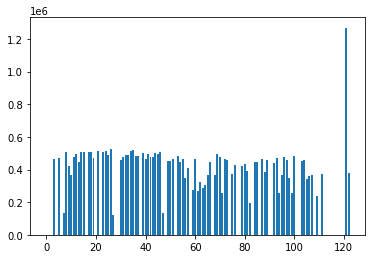

In [39]:
records_array =np.zeros(np.max(idd_uniq)+1)
for item in id_records_dict:
    records_array[item] = id_records_dict[item]
print(records_array)
plt.bar(np.arange(0,max(idd_uniq)+1),records_array)

[      0.       0.       0.       0.       0.       0.       0.  131753.
  508506.       0.       0.  474258.       0.       0.  507791.       0.
       0.  508058.       0.  468463.       0.       0.       0.  508496.
       0.       0.  523660.  122838.       0.       0.       0.  475734.
       0.  489204.  515546.  520571.       0.       0.       0.       0.
  465524.       0.       0.       0.       0.       0.  509826.  132309.
       0.  449340.       0.  463746.       0.       0.       0.  466390.
       0.  409707.       0.  275774.  462547.  267775.  325345.  287042.
       0.  364818.       0.       0.       0.  494813.  477651.  255942.
  462363.  457270.       0.  371510.  427241.       0.       0.  421204.
  435960.  388750.  194407.       0.  447777.       0.       0.  462860.
  384518.  457590.       0.       0.       0.  471416.       0.       0.
  474777.  455939.  347117.       0.  481362.       0.       0.  453399.
  455293.       0.       0.       0.       0.  2403

<BarContainer object of 123 artists>

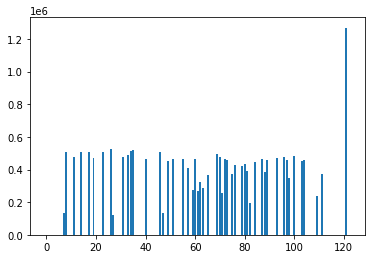

In [40]:
new_records_array = np.zeros(np.max(idd_uniq)+1)
for id in id_array:
    new_records_array[id] = id_records_dict[id]
print(new_records_array)
plt.bar(np.arange(0,max(idd_uniq)+1),new_records_array)

In [43]:
# 原始数据与剔除后数据的对比
print('ori:',np.sum(records_array))
print('after:',np.sum(new_records_array))
print('ratio:',np.sum(new_records_array)/np.sum(records_array))

ori: 37916915.0
after: 21797635.0
ratio: 0.5748789161776479


In [44]:
dfs = pd.DataFrame()
for id in id_array:
    tmp_df = df_sum[df_sum[idd] == id]
    dfs = pd.concat([dfs,tmp_df],axis=0)
print(len(dfs))

21797635


In [54]:
df_sub = dfs.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)

In [58]:
df_sub.to_hdf('rr_data.h5',key='df_sub',mode='w')

In [ ]:
df_sum.info()